## Intern: Archita Negi
#  Iris Flowers Classification ML Project  #

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Read the dataframe into the memory
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=['sepal length','sepal width','petal length','petal width','class'])

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#Data analysis
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

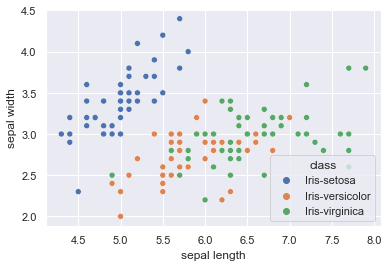

In [6]:
#Observing relation between 'sepal length' and 'sepal width'
sns.scatterplot('sepal length','sepal width',hue='class',data= df)

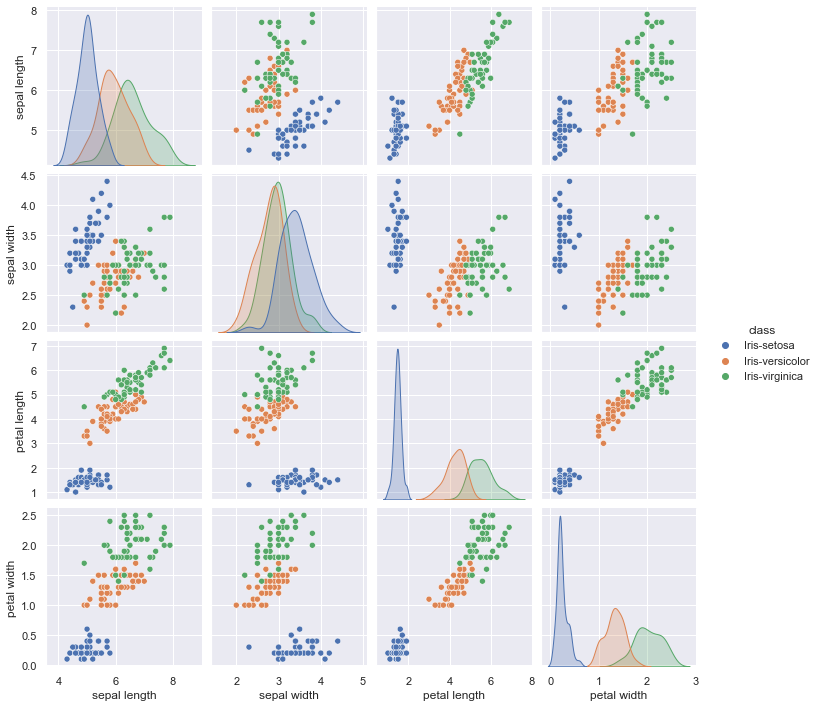

In [7]:
#Observing relation between numeric variables
sns.pairplot(df,hue='class')

We can see that there is some intrinsic classifiction in this data

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


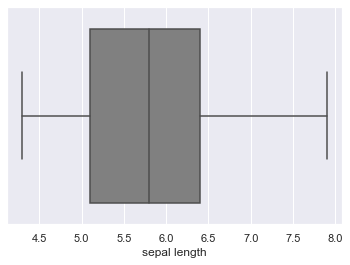

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


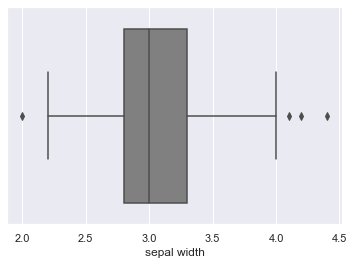

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


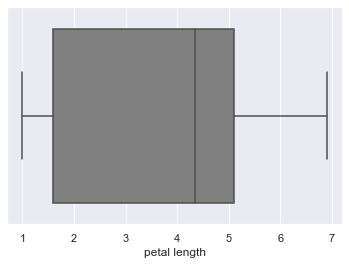

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


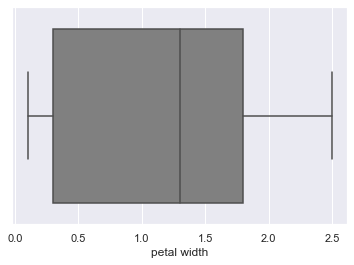

In [8]:
#Plotting boxplot to see how the values in the data are spread out.
for i in df[['sepal length','sepal width','petal length','petal width']]:
    sns.boxplot(df[i],data=df,color='grey')
    plt.show()

<AxesSubplot:>

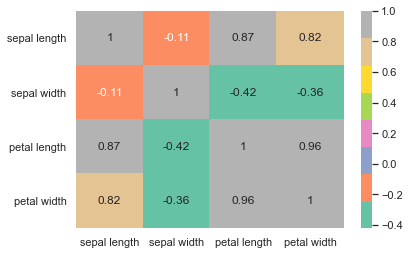

In [9]:
#Observing correlation between different numeric variables
sns.heatmap(df.corr(),cmap='Set2',annot=True)

In [10]:
df['sepal length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length, Length: 150, dtype: float64

In [11]:
# Renaming the entries in 'class' column
for i in ['Iris-setosa','Iris-versicolor','Iris-virginica']:
     df['class']=df['class'].replace(to_replace=i,value=i.split('-')[1])

In [12]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
#Checking for null values
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [14]:
#Reshaping the data
X=df[['sepal length','sepal width','petal length','petal width']]
y=df['class']

In [23]:
#Test and Train Algorithm
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [16]:
#Importing different classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc
from sklearn import metrics

In [24]:
#Instantiation of Gaussian Naive Bayes algorithm
model= GaussianNB()
model.fit(X_train,y_train)
y_model=model.predict(X_test)

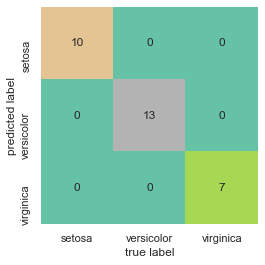

In [25]:
#Checking the accuracy of model
mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=['setosa','versicolor','virginica'], yticklabels=['setosa','versicolor','virginica'],cmap='Set2')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [26]:
print("accuracy_score=",accuracy_score(y_test,y_model))

accuracy_score= 1.0


In [27]:
#We can repeat the same process for other classification models as well
#So we create a generalised function 
#Function to see accuracy of different classification models on our data
def choose_model(model1):
    model= model1()
    model.fit(X_train,y_train)
    y_model=model.predict(X_test)
    mat = confusion_matrix(y_test, y_model)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=['setosa','versicolor','virginica'], yticklabels=['setosa','versicolor','virginica'],cmap='Paired')
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    print("accuracy_score=",accuracy_score(y_test,y_model))

accuracy_score= 0.9666666666666667


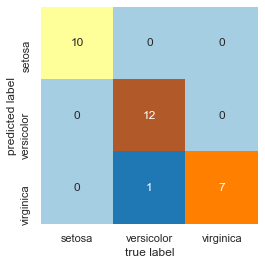

In [28]:
#Checking the accuracy with KNeighborsClassifiers
choose_model(KNeighborsClassifier)

accuracy_score= 0.9666666666666667


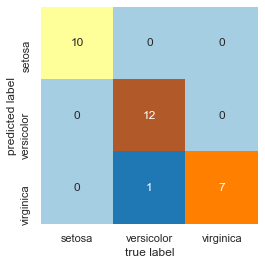

In [29]:
#Checking the accuracy with Support Vector Classifier
choose_model(SVC)